In [145]:
#패키지 불러오기

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [146]:
#글씨체 설정

matplotlib.rc('font', family="Malgun Gothic")
plt.rc('font', family = 'Malgun Gothic')

In [147]:
#데이터 불러오기

df = pd.read_csv ('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv', engine='python', encoding='euc-KR')
df

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2019,1,A,골목상권,1000985,암사길,CS200003,예술학원,20061598,125,...,0,93,32,0,0,32,93,0,0,3
1,2019,1,A,골목상권,1000267,돌곶이로8길,CS200037,노래방,510636,21,...,8,4,17,0,0,0,9,4,8,1
2,2019,1,R,전통시장,1001445,영도시장,CS300027,섬유제품,4038928,33,...,0,17,0,0,0,17,0,0,0,2
3,2019,1,A,골목상권,1000789,난곡로24길,CS300017,시계및귀금속,5085873,10,...,0,5,5,0,0,0,5,0,5,1
4,2019,1,A,골목상권,1000930,언주로81길,CS200001,일반교습학원,527027,53,...,53,53,0,0,0,0,0,53,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135573,2019,4,R,전통시장,1001469,양재시장,CS300011,일반의류,14282341,48,...,0,0,48,0,0,48,0,0,0,2
135574,2019,4,A,골목상권,1000181,망우로21길,CS100004,양식음식점,562291801,23923,...,228,12935,9718,469,6166,6432,4792,3474,1319,2
135575,2019,4,A,골목상권,1000441,세무서2길,CS300002,편의점,518371562,81848,...,17654,57240,24608,2813,30887,15345,14338,12869,5596,2
135576,2019,4,D,발달상권,1001044,양재역_3,CS200001,일반교습학원,15509601,56,...,6,25,31,0,0,12,44,0,0,6


In [148]:
#데이터 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135578 entries, 0 to 135577
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준_년_코드          135578 non-null  int64 
 1   기준_분기_코드         135578 non-null  int64 
 2   상권_구분_코드         135578 non-null  object
 3   상권_구분_코드_명       135578 non-null  object
 4   상권_코드            135578 non-null  int64 
 5   상권_코드_명          135578 non-null  object
 6   서비스_업종_코드        135578 non-null  object
 7   서비스_업종_코드_명      135578 non-null  object
 8   당월_매출_금액         135578 non-null  int64 
 9   당월_매출_건수         135578 non-null  int64 
 10  주중_매출_비율         135578 non-null  int64 
 11  주말_매출_비율         135578 non-null  int64 
 12  월요일_매출_비율        135578 non-null  int64 
 13  화요일_매출_비율        135578 non-null  int64 
 14  수요일_매출_비율        135578 non-null  int64 
 15  목요일_매출_비율        135578 non-null  int64 
 16  금요일_매출_비율        135578 non-null  int64 
 17  토요일_매출_비율 

In [149]:
#데이터 결측값 확인 > null값 없음

df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [150]:
#필요한 데이터만 정제하여 DataFrame화
#금액 기준이 아닌, 비율로 체크 (좀 더 합리적이라고 생각하여,)

df_new=pd.DataFrame()
df_new['location'] = df['상권_코드_명']
df_new['market'] = df['상권_구분_코드_명']
df_new['category'] = df['서비스_업종_코드_명']
df_new['prices'] = df['당월_매출_금액']
df_new['count'] = df['당월_매출_건수']
df_new['ratio'] = (df['당월_매출_금액'] / df['당월_매출_건수'])
df_new['weekdays'] = df['주중_매출_비율']
df_new['weekend'] = df['주말_매출_비율']
df_new['male'] = df['남성_매출_비율']
df_new['female'] = df['여성_매출_비율']
df_new['child'] = df['연령대_10_매출_비율'] #10대는 따로 확인
df_new['adult'] = (df['연령대_20_매출_비율'] + df['연령대_30_매출_비율'] + df['연령대_40_매출_비율']) #20,30,40대는 하나로 묶어서 확인
df_new['senior'] = (df['연령대_50_매출_비율'] + df['연령대_60_이상_매출_비율']) #50대, 60대 이상 하나로 묶어서 확인
df_new['store'] = df['점포수']

df_new.round(2) #소수점 두 자리 수까지 나오게 함
df_new.head() #데이터 간략하게 체크

,location,market,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store
0,암사길,골목상권,예술학원,20061598,125,160492.784000,100,0,75,25,0,100,0,3
1,돌곶이로8길,골목상권,노래방,510636,21,24316.000000,100,0,19,81,0,43,57,1
2,영도시장,전통시장,섬유제품,4038928,33,122391.757576,100,0,100,0,0,100,0,2
3,난곡로24길,골목상권,시계및귀금속,5085873,10,508587.300000,50,50,50,50,0,50,50,1
4,언주로81길,골목상권,일반교습학원,527027,53,9943.905660,100,0,100,0,0,0,100,3


<AxesSubplot:>

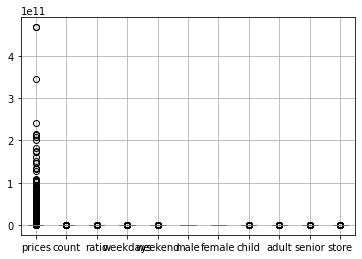

In [151]:
#이상치 확인

df_new.boxplot()

<AxesSubplot:>

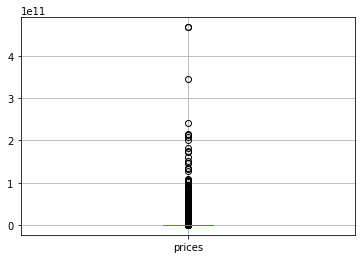

In [152]:
#이상치가 prices에서만 보이므로, prices만 따로 빼서 확인

df_new.boxplot('prices')

In [153]:
#box plot의 y값 기준을 확인하기 위해, max값 확인

df_new['prices'].max()

468177402982

In [154]:
#max값 단위에 따른, 300,000,000,000 (3천억 이상 단위) 제외

df_new = df_new[df_new['prices']<300000000000]

<AxesSubplot:title={'center':'prices'}, xlabel='category'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: 

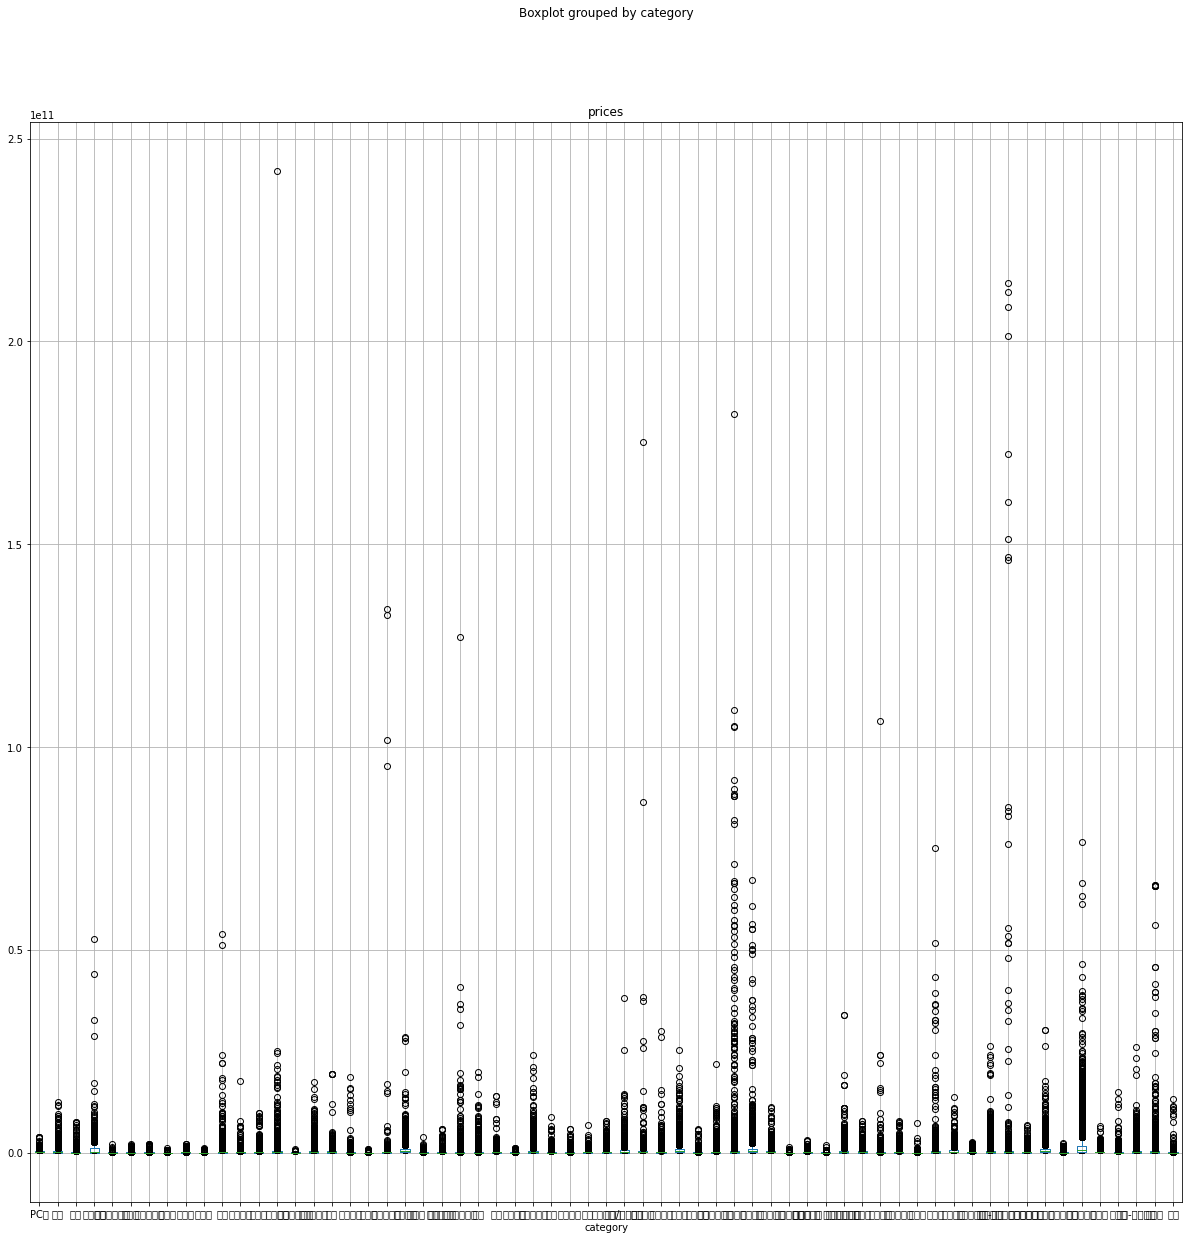

In [155]:
# 업종별 한달 평균 매출의 이상치 확인

df_new.boxplot('prices', by='category', figsize=(20,20))

In [156]:
#box plot의 단위 확인

df_new['prices'].max()

242036013085

In [157]:
#prices의 항목별로 봐서도 100,000,000,000 (천억) 이상은 전부 이상치로 확인

df_new = df_new[df_new['prices'] < 100000000000]

<AxesSubplot:title={'center':'prices'}, xlabel='category'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: 

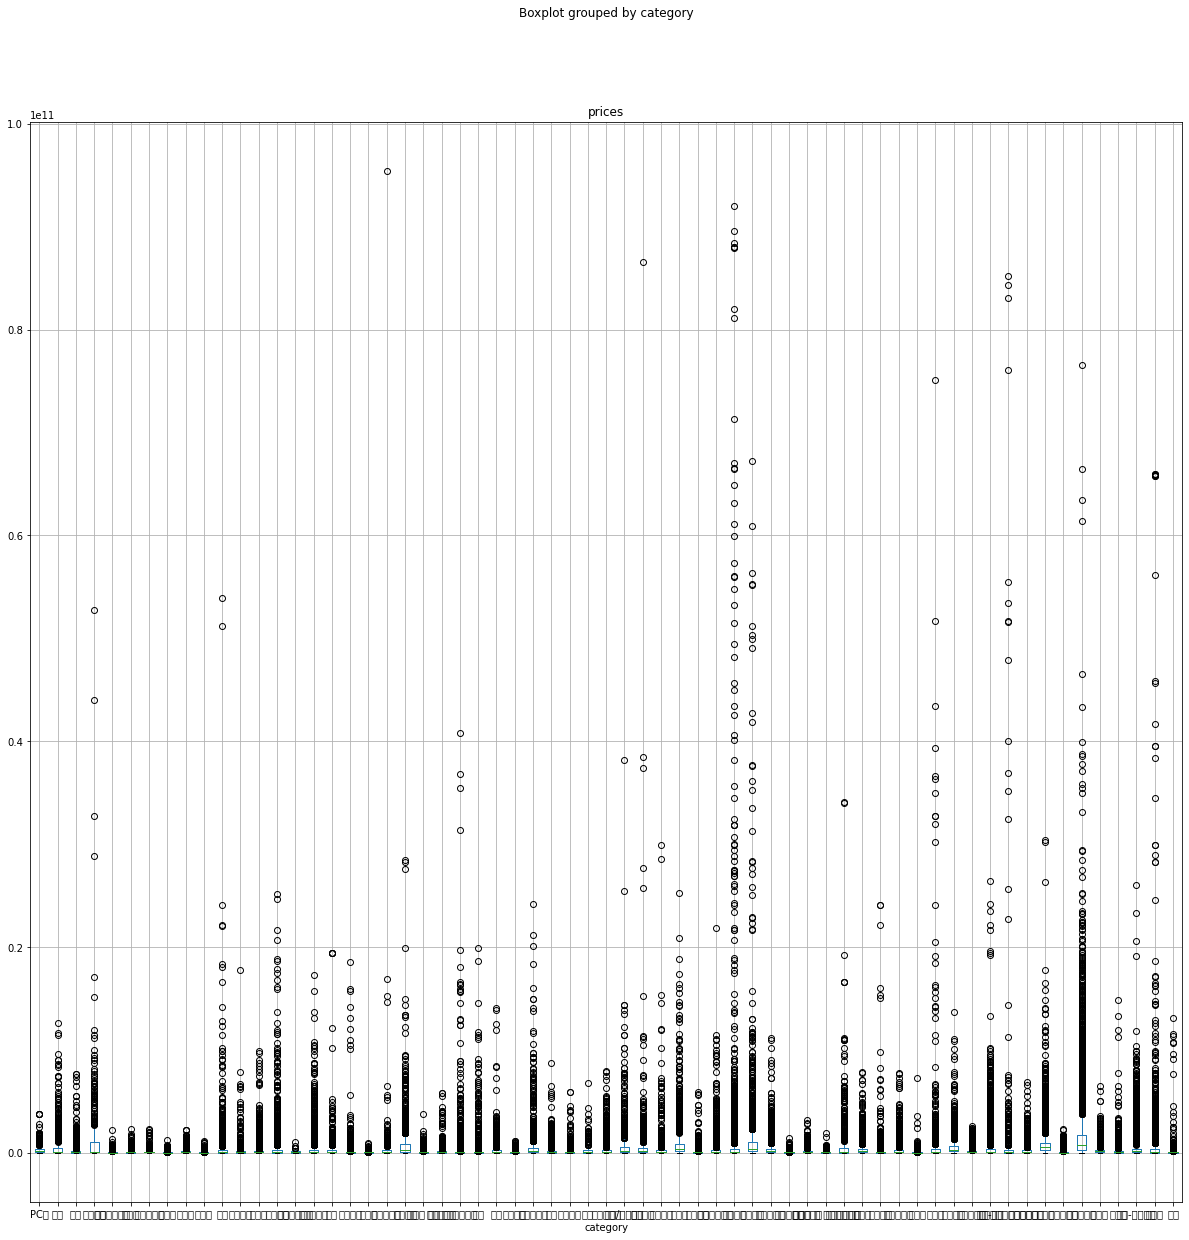

In [158]:
#다시 box plot 재확인

df_new.boxplot('prices', by='category', figsize=(20,20))

In [159]:
#가장 위의 이상치 확인 후 > drop

df_new[df_new['prices']==df_new['prices'].max()]

,location,market,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store
71455,서울 동작구 노량진1동_1,발달상권,수산물판매,95428524944,1405612,67891.085836,58,42,61,39,0,53,47,119


In [160]:
#이상치 drop

df_new.drop(71455, axis=0, inplace=True)

In [161]:
#box plot이 제일 넓게 분포된 업종 확인 > 일반의류
df_new[df_new['prices']==df_new['prices'].max()]

,location,market,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store
132991,평화시장,전통시장,일반의류,91990210965,802675,114604.554726,57,43,39,61,1,78,21,1333


In [162]:
#업종이 일반의류인 인덱스를 리스트에 담고

cloth_col=list(df_new[df_new['category']=='일반의류'].index)

In [163]:
df_new_new = df_new.drop(cloth_col, axis=0, inplace=False) #일반의류만 제거한 새로운 dataframe 생성
df_new_new.head()

,location,market,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store
0,암사길,골목상권,예술학원,20061598,125,160492.784000,100,0,75,25,0,100,0,3
1,돌곶이로8길,골목상권,노래방,510636,21,24316.000000,100,0,19,81,0,43,57,1
2,영도시장,전통시장,섬유제품,4038928,33,122391.757576,100,0,100,0,0,100,0,2
3,난곡로24길,골목상권,시계및귀금속,5085873,10,508587.300000,50,50,50,50,0,50,50,1
4,언주로81길,골목상권,일반교습학원,527027,53,9943.905660,100,0,100,0,0,0,100,3


<AxesSubplot:title={'center':'prices'}, xlabel='category'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: 

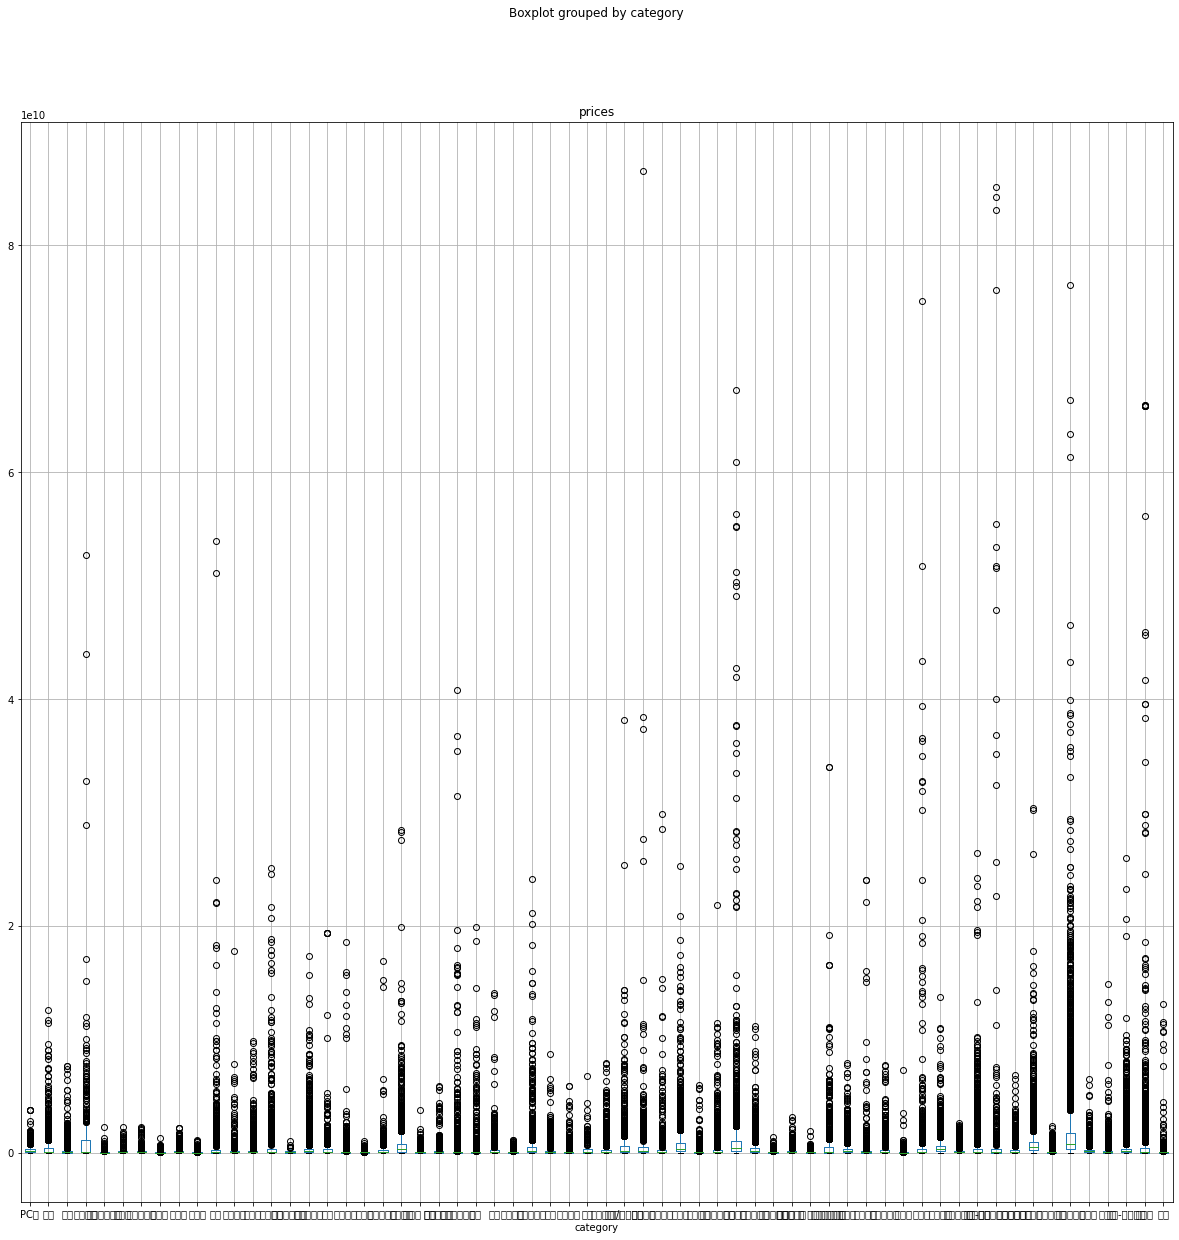

In [164]:
df_new_new.boxplot('prices', by='category', figsize=(20,20))

In [165]:
#y축 단위 확인
df_new_new['prices'].max()

86567442933

In [166]:
df_new_new

,location,market,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store
0,암사길,골목상권,예술학원,20061598,125,160492.784000,100,0,75,25,0,100,0,3
1,돌곶이로8길,골목상권,노래방,510636,21,24316.000000,100,0,19,81,0,43,57,1
2,영도시장,전통시장,섬유제품,4038928,33,122391.757576,100,0,100,0,0,100,0,2
3,난곡로24길,골목상권,시계및귀금속,5085873,10,508587.300000,50,50,50,50,0,50,50,1
4,언주로81길,골목상권,일반교습학원,527027,53,9943.905660,100,0,100,0,0,0,100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135572,도산대로81길,골목상권,화장품,1724533532,1824,945467.945175,67,33,47,53,1,77,22,7
135574,망우로21길,골목상권,양식음식점,562291801,23923,23504.234461,55,45,35,65,1,79,20,2
135575,세무서2길,골목상권,편의점,518371562,81848,6333.344272,71,29,70,30,3,75,23,2
135576,양재역_3,발달상권,일반교습학원,15509601,56,276957.160714,100,0,54,46,0,100,0,6


In [167]:
#20,000,000,000(200억) 이상은 이상치로 처리해버림
#일반의류는 함부로 판단하지 못할 정도로, 이상치가 많아서 살려둠


df_new_new = df_new_new[df_new_new['prices'] < 20000000000]
df_new_sub = df_new[df_new['category']=='일반의류']
df_sub=pd.concat([df_new_new, df_new_sub]) #일반의류는 살려두고 나머지, 200억 이상의 이상치는 제거한 값들
df_sub.isnull().sum() #정상적으로 합쳐졌는지 확인 > null값 존재하지 않음 > 정상

location    0
market      0
category    0
prices      0
count       0
ratio       0
weekdays    0
weekend     0
male        0
female      0
child       0
adult       0
senior      0
store       0
dtype: int64

In [168]:
#데이터 확인

df_sub.head(30)

,location,market,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store
0,암사길,골목상권,예술학원,20061598,125,160492.784000,100,0,75,25,0,100,0,3
1,돌곶이로8길,골목상권,노래방,510636,21,24316.000000,100,0,19,81,0,43,57,1
2,영도시장,전통시장,섬유제품,4038928,33,122391.757576,100,0,100,0,0,100,0,2
3,난곡로24길,골목상권,시계및귀금속,5085873,10,508587.300000,50,50,50,50,0,50,50,1
4,언주로81길,골목상권,일반교습학원,527027,53,9943.905660,100,0,100,0,0,0,100,3
5,천중로39길,골목상권,스포츠 강습,22390312,168,133275.666667,100,0,22,78,0,100,0,1
6,암사종합시장,전통시장,수산물판매,1712543938,108896,15726.417297,64,36,41,59,0,42,57,9
7,개봉로1길,골목상권,슈퍼마켓,42028959,3945,10653.728517,68,32,74,26,0,67,33,5
8,남현2길,골목상권,외국어학원,50811096,209,243115.291866,100,0,48,52,0,100,0,0
9,남현길,골목상권,문구,4275231,605,7066.497521,97,3,34,66,0,99,2,1


In [169]:
# 최대한 바꿔봤으나 안바뀌는 부분 존재, 왜 안바뀌는 지 알 수 없음 ㅠㅜ..!

for index, value in enumerate (df_sub['location']):
    if '로' in value :
        num = value.find('로')
        df_sub['location'][index]=value[:num+1]



<ipython-input-169-835fef828c38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['location'][index]=value[:num+1]


In [172]:
for index, value in enumerate (df_sub['location']):
    if '_' in value :
        num = value.find('_')
        df_sub['location'][index]=value[:num]


<ipython-input-172-f0166e3ca6da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['location'][index]=value[:num]


In [173]:
df_sub.tail(30)

,location,market,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store
134858,구로,발달상권,일반의류,154716759,1588,9.742869e+04,81,19,35,65,0,51,50,13
134864,화곡로,전통시장,일반의류,138209428,1575,8.775202e+04,42,58,60,40,3,90,8,10
134943,오류로,골목상권,일반의류,27036154,26,1.039852e+06,73,27,0,100,0,50,50,15
134960,양재대로,발달상권,일반의류,84191165,921,9.141277e+04,87,13,12,88,0,35,65,8
134976,세검정로,전통시장,일반의류,96405047,3102,3.107835e+04,61,39,12,88,9,84,7,4
134980,뚝섬로,골목상권,일반의류,19784014,263,7.522439e+04,67,33,8,92,0,13,87,4
135004,퇴계로,전통시장,일반의류,10494622,334,3.142102e+04,61,39,89,11,0,62,38,5
135026,길음로,골목상권,일반의류,27772736,35,7.935067e+05,100,0,0,100,0,100,0,2
135055,건대입구역,발달상권,일반의류,5683547985,111013,5.119714e+04,65,35,18,82,2,76,23,36
135060,도당로29길,골목상권,일반의류,383543182,3744,1.024421e+05,77,23,35,65,1,32,67,9


In [178]:
df_dummy = pd.get_dummies(df_sub, columns=['market'])
df_dummy.head(50)

,location,category,prices,count,ratio,weekdays,weekend,male,female,child,adult,senior,store,market_골목상권,market_관광특구,market_발달상권,market_전통시장
0,암사길,예술학원,20061598,125,160492.784000,100,0,75,25,0,100,0,3,1,0,0,0
1,돌곶이로,노래방,510636,21,24316.000000,100,0,19,81,0,43,57,1,1,0,0,0
2,영도시장,섬유제품,4038928,33,122391.757576,100,0,100,0,0,100,0,2,0,0,0,1
3,난곡로,시계및귀금속,5085873,10,508587.300000,50,50,50,50,0,50,50,1,1,0,0,0
4,언주로,일반교습학원,527027,53,9943.905660,100,0,100,0,0,0,100,3,1,0,0,0
5,천중로,스포츠 강습,22390312,168,133275.666667,100,0,22,78,0,100,0,1,1,0,0,0
6,암사종합시장,수산물판매,1712543938,108896,15726.417297,64,36,41,59,0,42,57,9,0,0,0,1
7,개봉로,슈퍼마켓,42028959,3945,10653.728517,68,32,74,26,0,67,33,5,1,0,0,0
8,남현2길,외국어학원,50811096,209,243115.291866,100,0,48,52,0,100,0,0,1,0,0,0
9,남현길,문구,4275231,605,7066.497521,97,3,34,66,0,99,2,1,1,0,0,0


In [175]:
df_dummy_ = df_dummy.groupby(['category', 'location']).mean()
df_dummy_.head()

prices         count        ratio   weekdays  \
category location                                                        
PC방      가로         1.695514e+08  38687.500000  4381.597083  65.000000   
         가로공원로76가길  7.484275e+07  16370.000000  4571.945632  55.000000   
         가마산로       1.041795e+08  20003.500000  4230.228673  58.500000   
         가산디지털단지역   2.792537e+08  71419.000000  4154.449310  66.600000   
         가산로        1.980821e+08  48837.333333  4006.368778  66.666667   

                      weekend  male  female      child      adult    senior  \
category location                                                             
PC방      가로         35.000000  79.0    21.0  21.500000  73.500000  5.500000   
         가로공원로76가길  45.000000  87.0    13.0   5.000000  94.000000  1.000000   
         가마산로       41.500000  77.5    22.5  10.500000  81.000000  8.000000   
         가산디지털단지역   33.400000  79.6    20.4  12.200000  83.400000  4.400000   
         가산로        33.333333  84.0    16.0  12.333333  83.666667  4.666667   

                    store  market_골목상권  market_관광특구  market_발달상권  market_전통시장  
category location                                                              
PC방      가로           1.0     0.500000          0.0     0.000000          0.5  
         가로공원로76가길    1.0     1.000000          0.0     0.000000          0.0  
         가마산로         2.0     0.500000          0.0     0.500000          0.0  
         가산디지털단지역     3.0     0.800000          0.0     0.200000          0.0  
         가산로          1.0     0.666667          0.0     0.333333          0.0

In [177]:
#가게 종목 별로 매출 금액의 단위가 달라진다고 생각하여, (업종 별로 위치 별)

df_groupby = df_dummy.groupby(['category', 'location']).mean()
df_groupby.head(50)

prices          count        ratio   weekdays  \
category location                                                            
PC방      가로            1.695514e+08   38687.500000  4381.597083  65.000000   
         가로공원로76가길     7.484275e+07   16370.000000  4571.945632  55.000000   
         가마산로          1.041795e+08   20003.500000  4230.228673  58.500000   
         가산디지털단지역      2.792537e+08   71419.000000  4154.449310  66.600000   
         가산로           1.980821e+08   48837.333333  4006.368778  66.666667   
         가산로5길         5.587160e+07   12307.000000  4539.823190  59.000000   
         가재울로          2.839624e+08   49333.666667  5443.594917  62.000000   
         가좌로           2.979176e+08   68138.666667  4320.159078  78.000000   
         갈현로           9.549246e+07   22057.000000  4245.414727  67.714286   
         갈현로41길        1.317382e+07    2710.500000  5037.557501  59.500000   
         갈현로7길         1.755099e+08   40702.000000  4291.949885  65.500000   
         강남구 논현역       6.520234e+07   15596.333333  4467.837708  69.666667   
         강남구 논현역_1     1.076584e+09  234373.000000  4581.105925  67.500000   
         강남구 논현역_2     2.272909e+08   46431.500000  4885.383613  64.500000   
         강남구 논현역_4     4.682211e+07   12788.000000  3666.850709  66.333333   
         강남구 신사역_1     1.322906e+07    4075.000000  3246.396074  68.000000   
         강남대로          9.293825e+07   21558.125000  4663.008055  65.125000   
         강남대로34길       3.175672e+08   45578.000000  6967.554961  66.000000   
         강동대로          2.700000e+08   59359.000000  4548.594147  64.000000   
         강동대로53길       7.947327e+07   28289.000000  2809.334618  66.000000   
         강서구청          1.139387e+08   20128.000000  5660.708168  61.000000   
         강서로           1.969914e+08   41748.800000  4625.267426  66.000000   
         강서로45다길       1.791209e+08   37832.000000  4734.638824  64.000000   
         개봉동 현대아파트 인근  3.639505e+08   81397.000000  4480.811253  62.666667   
         개봉로           2.979954e+08   68053.333333  4676.945408  66.555556   
         개봉로11길        1.566316e+07    3354.333333  4644.019263  59.333333   
         개봉로17다길       4.305628e+08   98330.000000  4378.448292  60.500000   
         개봉로23가길       4.052252e+08  106510.500000  3802.594553  65.500000   
         개봉로3길         1.473527e+08   31083.000000  4740.621304  61.000000   
         개운사길          9.603654e+08  223222.000000  4302.288251  72.000000   
         개포로           2.693740e+08   68428.500000  3781.351548  64.500000   
         개화동로          2.891925e+08   60475.000000  4532.276513  65.500000   
         거마로           1.247792e+08   27803.500000  4486.509623  64.000000   
         겸재로           1.285552e+08   25104.333333  4856.528768  62.333333   
         겸재로36길        6.107792e+07   13915.000000  4389.357959  67.000000   
         경인로           1.333868e+08   33772.333333  5848.930821  64.333333   
         경인로47길        5.305628e+08  131307.000000  4031.519332  71.000000   
         경희대로          1.912805e+08   44177.000000  4329.865699  65.000000   
         경희대로3길        3.710640e+06     571.500000  5507.187674  81.500000   
         고덕로           2.316291e+08   47264.714286  4802.474413  64.285714   
         고덕로10길        1.306969e+09  217664.000000  6004.526330  63.000000   
         고덕전통시장        4.326539e+07   10947.000000  3952.259797  68.000000   
         고무래로          4.275790e+08   85703.000000  4939.090958  64.000000   
         고무래로8길        5.533486e+08  130121.500000  4276.013351  65.500000   
         고척근린시장        5.678475e+08  123997.500000  4579.799947  65.500000   
         고척로           3.312885e+08   62080.833333  5012.528918  64.500000   
         곰달래로          2.286804e+08   54416.625000  4455.187053  67.250000   
         곰달래로10길       1.388225e+08   25794.000000  5381.968907  62.000000   
         곰달래로25길       9.492235e+07   25343.000000  3745.505623  68.000000   
         곰달래로3길        1.597798e+07    3843.000000 

In [179]:
df_groupby[df_groupby['prices'] < 100000000 ]

prices         count         ratio   weekdays  \
category location                                                         
PC방      가로공원로76가길  7.484275e+07  16370.000000   4571.945632  55.000000   
         가산로5길      5.587160e+07  12307.000000   4539.823190  59.000000   
         갈현로        9.549246e+07  22057.000000   4245.414727  67.714286   
         갈현로41길     1.317382e+07   2710.500000   5037.557501  59.500000   
         강남구 논현역    6.520234e+07  15596.333333   4467.837708  69.666667   
...                          ...           ...           ...        ...   
화초       효창원로       1.864161e+07    998.000000  18678.968938  33.000000   
         효창원로39길    1.505874e+07    339.000000  44421.058997  81.000000   
         효창원로93길    1.742296e+06     42.000000  41483.238095  58.000000   
         후암로        5.084069e+07   1660.000000  28672.351168  74.666667   
         휘경로        5.956952e+07   2061.428571  45052.835744  79.285714   

                      weekend       male     female      child       adult  \
category location                                                            
PC방      가로공원로76가길  45.000000  87.000000  13.000000   5.000000   94.000000   
         가산로5길      41.000000  83.000000  17.000000   1.000000   99.000000   
         갈현로        32.571429  79.714286  20.428571  15.857143   79.000000   
         갈현로41길     40.500000  87.250000  13.000000  16.750000   83.000000   
         강남구 논현역    30.333333  82.333333  17.666667  20.666667   76.333333   
...                       ...        ...        ...        ...         ...   
화초       효창원로       67.000000  22.000000  78.000000   0.000000   95.000000   
         효창원로39길    19.000000  65.000000  36.000000   0.000000   60.000000   
         효창원로93길    42.000000  75.000000  25.000000   0.000000  100.000000   
         후암로        25.333333  41.666667  58.333333   4.333333   68.333333   
         휘경로        21.000000  46.285714  53.714286   1.857143   75.714286   

                       senior     store  market_골목상권  market_관광특구  \
category location                                                   
PC방      가로공원로76가길   1.000000  1.000000     1.000000          0.0   
         가산로5길       2.000000  2.000000     1.000000          0.0   
         갈현로         5.428571  1.857143     0.285714          0.0   
         갈현로41길      0.500000  1.000000     1.000000          0.0   
         강남구 논현역     3.666667  2.666667     0.000000          0.0   
...                       ...       ...          ...          ...   
화초       효창원로        6.000000  4.000000     1.000000          0.0   
         효창원로39길    40.000000  1.000000     1.000000          0.0   
         효창원로93길     0.000000  1.000000     1.000000          0.0   
         후암로        27.333333  2.666667     0.666667          0.0   
         휘경로        22.428571  3.428571     0.285714          0.0   

                    market_발달상권  market_전통시장  
category location                             
PC방      가로공원로76가길     0.000000     0.000000  
         가산로5길         0.000000     0.000000  
         갈현로           0.285714     0.428571  
         갈현로41길        0.000000     0.000000  
         강남구 논현역       0.333333     0.666667  
...                         ...          ...  
화초       효창원로          0.000000     0.000000  
         효창원로39길       0.000000     0.000000  
         효창원로93길       0.000000     0.000000  
         후암로           0.333333     0.000000  
         휘경로           0.571429     0.142857  

[21604 rows x 15 columns]

In [ ]:
input_category=input('Enter what you want to know category : ')
input_location=input('Enter what you want to know location : ')


    
def want (k):
    kk= str(k)
    global input_category
    global input_location
    answer = df_groupby[kk][input_category][input_location].round(2)
    return answer

print()
print('입력하신 업종과 위치의 평균 매출은', want('prices'), '이며, 평균 한 달 판매 건수는',want('count'),'입니다.')
print('평균적으로 한 번의 판매액은 ', want('ratio'), '정도이며, 총 매장 개수는 ', int(want('store')), '개 입니다.') 
print('또한, 소비자의 평일 소비자 비율과 주말 소비자 비율은', int(want('weekdays')),':',int(want('weekend')),' 남자 소비자와 여자 소비자의 비율은',int(want('male')),':',int(want('female')),' (남:여) 이고,' )
print('평균 소비자의 연령대는', int(want('child')),'(10대) : ',int(want('adult')),'(2~40대) : ',int(want('senior')),'(50대이상) 입니다.')
print('위 데이터의 제공 데이터의 비율은 골목상권:관광특구:발달상권:전통시장 =',want('market_골목상권'),":",want('market_관광특구'),":",want('market_발달상권'),":",want('market_전통시장'),"입니다! 참고하시길 바랄게요 :)!")
print('감사합니다 ♥')

In [132]:
#위치 별로 업종별

df_groupby_ = df_dummy.groupby(['category','location']).mean()
df_groupby_

prices     count          ratio  weekdays  weekend  \
location category                                                             
가락시장     반찬가게      1.784158e+10  198941.0   89682.755711      79.0     21.0   
         양식음식점     7.876055e+07    3136.0   25114.971939      77.0     23.0   
         육류판매      9.030719e+09  115144.0   78429.781257      66.0     34.0   
         의약품       3.415911e+08   28091.0   12160.160372      86.0     14.0   
         일반의원      5.369358e+08   15485.0   34674.577914      90.0     10.0   
...                         ...       ...            ...       ...      ...   
흑석시장     중식음식점     1.752692e+08    3058.0   57314.981033      72.0     28.0   
         청과상       2.398207e+08   18933.0   12666.810173      79.0     21.0   
         치과의원      3.847024e+08    2389.5  160116.996423      91.5      9.0   
         피부관리실     1.603716e+08     660.5  186009.965210      91.5      9.0   
         호프-간이주점   2.197038e+08    4689.0   46855.151205      70.0     30.0   

                   male  female  child  adult  senior  store  market_골목상권  \
location category                                                           
가락시장     반찬가게      53.0    47.0    0.0   34.0    66.0    5.0          0.0   
         양식음식점     48.0    52.0    0.0   72.0    28.0    1.0          0.0   
         육류판매      57.0    43.0    0.0   48.0    53.0    5.0          0.0   
         의약품       64.0    36.0    0.0   61.0    39.0    3.0          0.0   
         일반의원      50.0    50.0    0.0   45.0    56.0    4.0          0.0   
...                 ...     ...    ...    ...     ...    ...          ...   
흑석시장     중식음식점     72.0    28.0    0.0   81.0    20.0    3.0          0.0   
         청과상       26.0    75.0    0.0   54.0    46.0    6.0          0.0   
         치과의원      53.5    46.5    0.5   42.0    57.0    4.0          0.0   
         피부관리실     16.0    84.5    0.0   60.0    40.0    7.0          0.0   
         호프-간이주점   61.0    39.0    0.0   72.0    27.0   12.0          0.0   

                   market_관광특구  market_발달상권  market_전통시장  
location category                                         
가락시장     반찬가게              0.0          1.0          0.0  
         양식음식점             0.0          1.0          0.0  
         육류판매              0.0          1.0          0.0  
         의약품               0.0          1.0          0.0  
         일반의원              0.0          1.0          0.0  
...                        ...          ...          ...  
흑석시장     중식음식점             0.0          0.0          1.0  
         청과상               0.0          0.0          1.0  
         치과의원              0.0          0.0          1.0  
         피부관리실             0.0          0.0          1.0  
         호프-간이주점           0.0          0.0          1.0  

[44902 rows x 15 columns]

In [139]:
df_groupby_['prices']['가락시장'][10000000<df_groupby_['prices']['가락시장'] ]

category
반찬가게       1.784158e+10
양식음식점      7.876055e+07
육류판매       9.030719e+09
의약품        3.415911e+08
일반의원       5.369358e+08
자동차수리      6.166157e+07
치과의원       3.807477e+08
커피-음료      2.991262e+08
한의원        3.997923e+07
호프-간이주점    7.935720e+08
Name: prices, dtype: float64